# Graph Classification
In this notebook we give an example of graph classification task. We generate graphs based on following types:
- cycle,
- star,
- wheel,
- complete,
- lollipop,
- hypercube,
- circular ladder,
- grid.

With number of nodes between $[10, 20]$. Next we train A deep Graph Convolution Network (GCN) for graph classification.
Finally, we visualize the results plotting the cost/score curves. In our case we use Categorical Cross Entropy as cost
and Accuracy score.

In [1]:
import tensorflow as tf
from algomorphism.model.models import GCNClassifier
from algomorphism.dataset.datasets.generate import SimpleGraphsDataset
from algomorphism.method.graph import a2g
import networkx as nx
import matplotlib.pyplot as plt
from algomorphism.figure.opt import multiple_models_history_figure

In [ ]:
# Optional GPU usage

# for gpu in tf.config.list_physical_devices('GPU'):
#     print(gpu)
#     tf.config.experimental.set_memory_growth(gpu, True)

## Generate graph dataset

In [ ]:
examples = 500
n_nodes_min = 10
n_nodes_max = 20
graph_types = ['cycle', 'star', 'wheel', 'complete', 'lollipop',
                'hypercube', 'circular_ladder', 'grid']

g_dataset = SimpleGraphsDataset(examples, n_nodes_min, n_nodes_max, graph_types)
g_dataset.generate_dataset()
a_train, _, _ , y_train = g_dataset.get_train_data()

## So graph examples

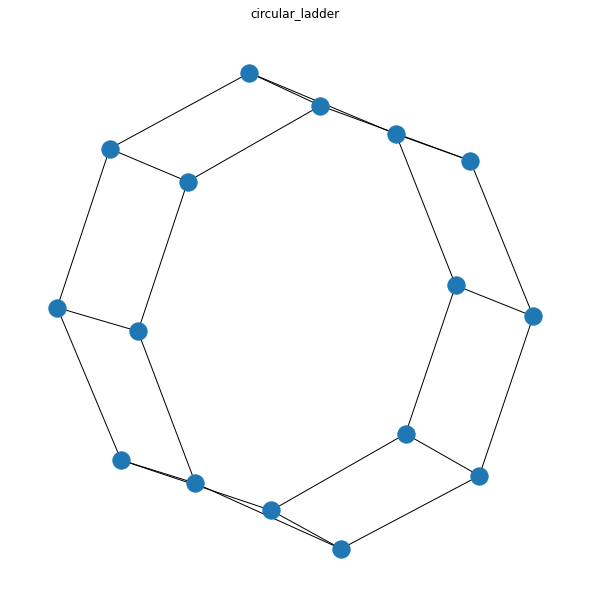

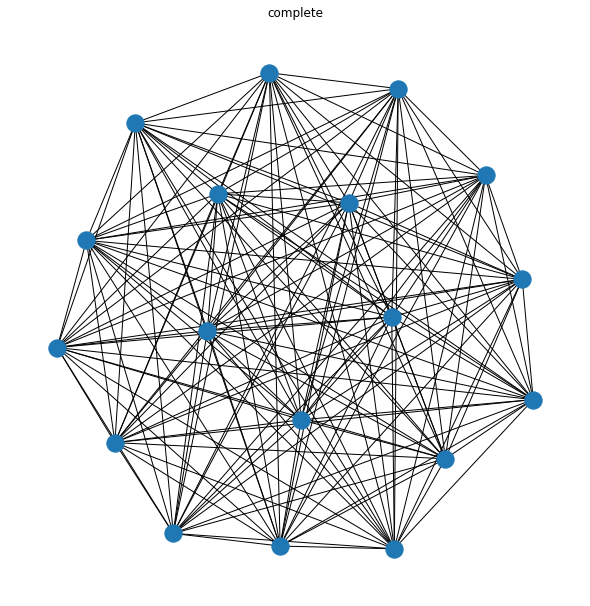

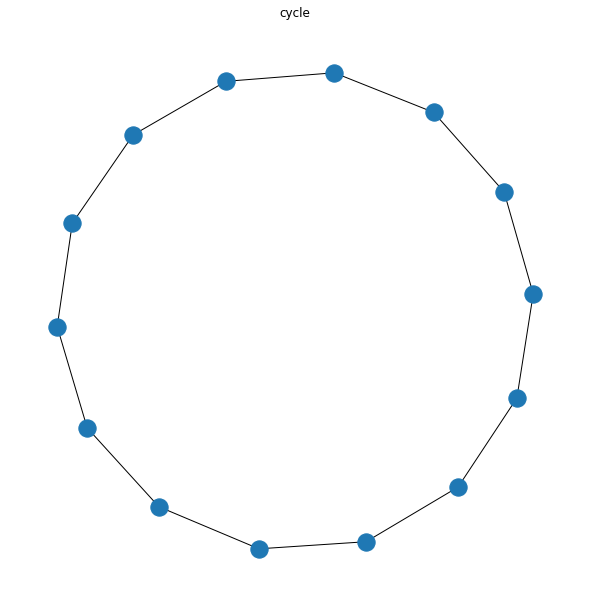

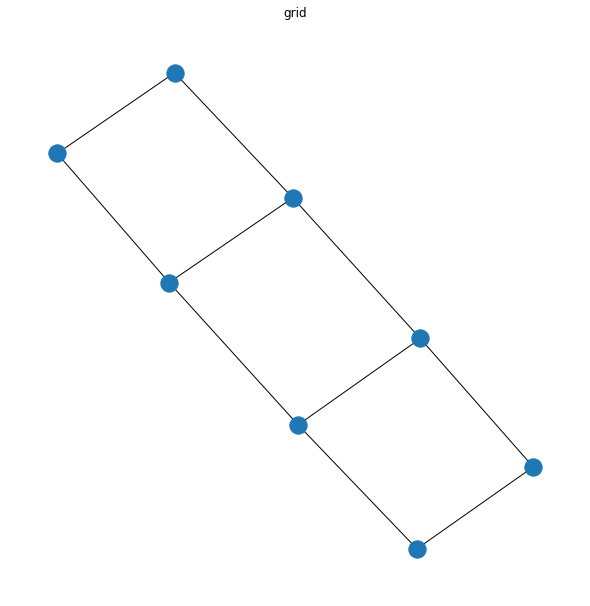

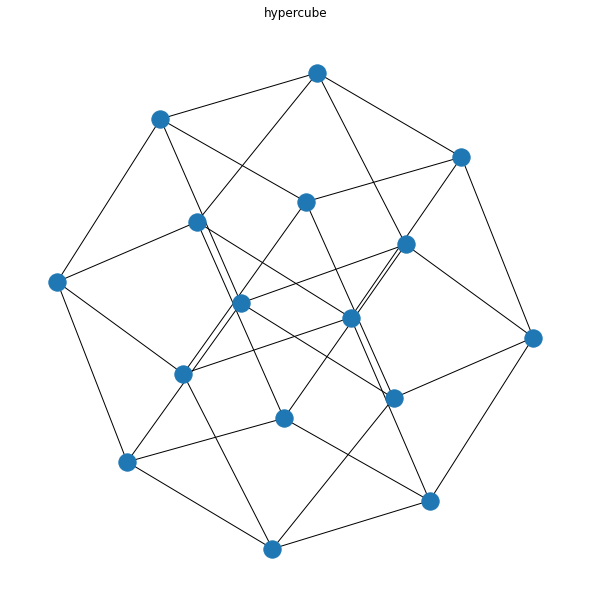

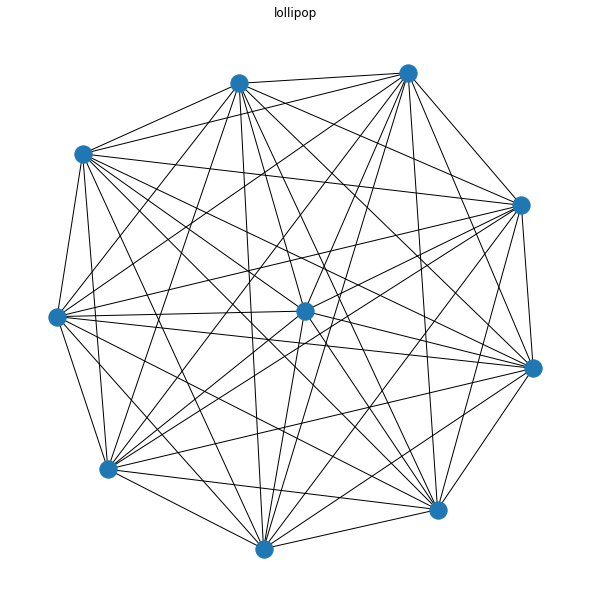

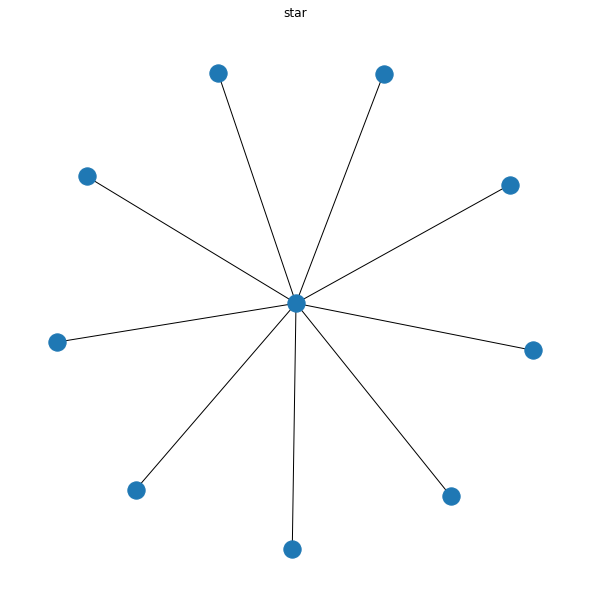

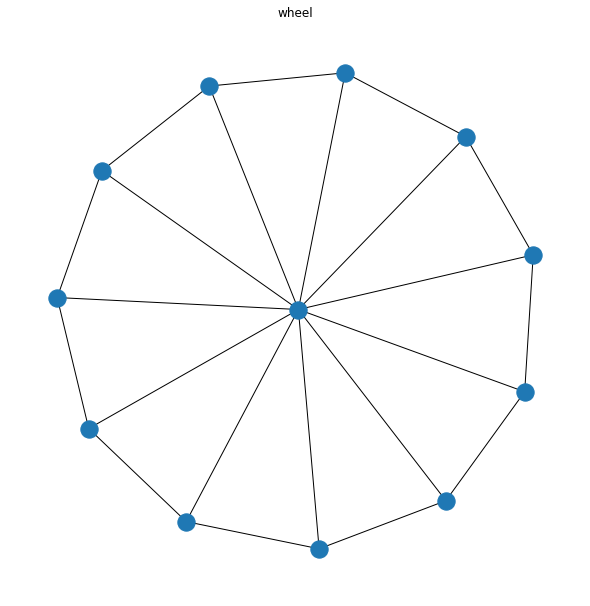

In [4]:
c = 0
c_max = y_train.shape[1]
for i in range(a_train.shape[0]):
    if c == tf.argmax(y_train[i]):
        c+=1
        g = a2g(a_train[i])
        plt.figure(figsize=(8,8))
        nx.draw(g)
        class_name = g_dataset.get_class_names_by_one_hot_vectors(y_train[i].reshape(1, -1))[0]
        plt.title(class_name)
    elif c == c_max:
        break

## Initialize & train GCN

In [5]:
input_shape = a_train.shape[1]
df_list = [
    a_train.shape[1],
    64,64,128,128
]
opt = tf.keras.optimizers.SGD(learning_rate=1e-2)
gcn = GCNClassifier(g_dataset, df_list=df_list, nc=len(graph_types), optimizer=opt, clip_norm=1e-0)

In [6]:
gcn.train(g_dataset, epochs=150, print_types=['train', 'val'])

2021-11-19 16:17:36.480186: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 1 finished
train cost: 1.9854600429534912
train score: 0.29750001430511475
val cost: 2.0247559547424316
val score: 0.25999999046325684
Epoch 2 finished
train cost: 1.8494447469711304
train score: 0.45500001311302185
val cost: 1.9119819402694702
val score: 0.3199999928474426
Epoch 3 finished
train cost: 1.6794114112854004
train score: 0.48750001192092896
val cost: 1.7495192289352417
val score: 0.4399999976158142
Epoch 4 finished
train cost: 1.481956124305725
train score: 0.5099999904632568
val cost: 1.591408133506775
val score: 0.4000000059604645
Epoch 5 finished
train cost: 1.2392420768737793
train score: 0.6499999761581421
val cost: 1.336401104927063
val score: 0.5400000214576721
Epoch 6 finished
train cost: 0.9634184837341309
train score: 0.7825000286102295
val cost: 1.070945382118225
val score: 0.6800000071525574
Epoch 7 finished
train cost: 0.6830192804336548
train score: 0.8149999976158142
val cost: 0.7855967879295349
val score: 0.699999988079071
Epoch 8 finished
train cost:

## Plot history

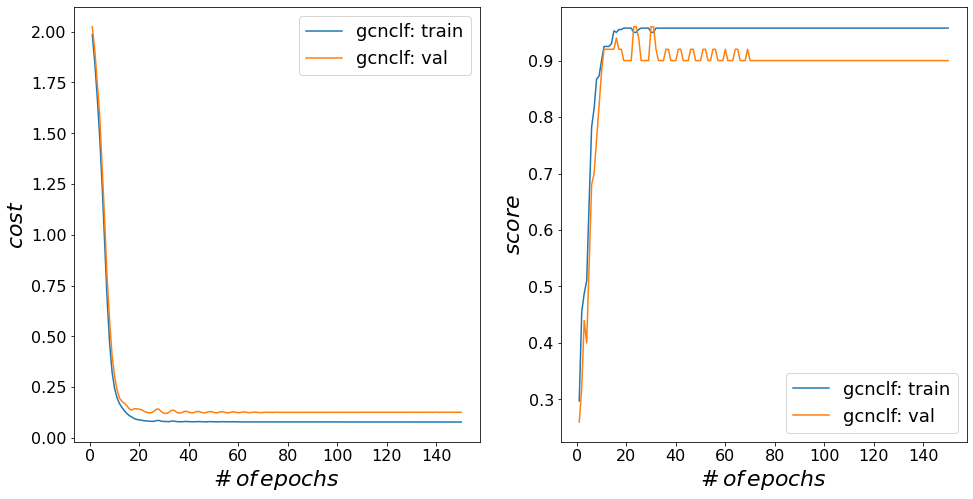

In [7]:
multiple_models_history_figure([gcn])

In [8]:
# Test accuracy
print(gcn.score_mtr.metric_dataset(g_dataset.test))
# Test cce
print(gcn.cost_mtr.metric_dataset(g_dataset.test))

tf.Tensor(0.92, shape=(), dtype=float32)
tf.Tensor(0.13070345, shape=(), dtype=float32)


## References
- Semi-Supervised Classification with Graph Convolutional Networks, [https://arxiv.org/pdf/1609.02907.pdf](https://arxiv.org/pdf/1609.02907.pdf)
